In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

# Prepare Data

## Load Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
def load_dataset():
    data = load_breast_cancer()
    df = pd.DataFrame(data['data'])
    df.columns = data['feature_names']
    df['cat 1'] = (df['mean radius'] + df['mean texture'] < df['worst radius'] / 0.5).astype('int')
    df['cat 2'] = (df['mean compactness'] * df['mean concavity'] < df['mean smoothness'] / 10).astype('int')
    df['cat 3'] = (df['mean symmetry'] / df['mean smoothness'] < df['worst symmetry'] * 7).astype('int')

    return copy.deepcopy(df)

In [5]:
df = load_dataset()
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0,0


## Simulate missing values

In [6]:
# 30% of data will be NaN
missing = 0.3
i_range, j_range = df.shape

for i in range(i_range):
    for j in range(j_range):
        if np.random.rand() < missing:
            df.iloc[i, j] = np.nan

# Third column - no values
df.iloc[:, 2] = np.nan
# Fourth column - all values present
df.iloc[:, 3] = [np.random.rand() for _ in range(len(df.iloc[:, 3]))]

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.99,NaN,NaN,0.394168,0.11840,NaN,0.3001,0.14710,NaN,0.07871,...,2019.0,NaN,0.6656,0.7119,NaN,0.4601,0.11890,1.0,0.0,1.0
1,20.57,17.77,NaN,0.719615,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1.0,0.0
2,NaN,21.25,NaN,0.872502,0.10960,NaN,NaN,0.12790,0.2069,NaN,...,1709.0,NaN,0.4245,0.4504,NaN,0.3613,0.08758,NaN,0.0,1.0
3,11.42,20.38,NaN,0.677614,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,NaN,0.6638,NaN,0.0,NaN,NaN
4,NaN,14.34,NaN,0.429431,NaN,0.13280,NaN,NaN,NaN,0.05883,...,1575.0,NaN,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0.0,0.0


# Interpolator Usage

## Load interpolator

In [7]:
from dataframe_interpolator.interpolator import Interpolator
# Load core model
from sklearn.ensemble import RandomForestRegressor

In [16]:
# With normalization
ip_model = Interpolator(model=RandomForestRegressor(), normalize=True, normalize_algorithm='minmax', n_iter=5,
                        verbose=True)

## Use Interpolator

In [17]:
df_result = ip_model.process(df.copy())

Iter	 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 Score 
0	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9663
1	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.974
2	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9739
3	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9742
4	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9737

In [18]:
df_result.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.9900,23.2345,NaN,0.394168,0.118400,0.239368,0.300100,0.147100,0.240215,0.078710,...,2019.0,0.187285,0.6656,0.7119,0.261840,0.4601,0.118900,1.00,0.0,1.00
1,20.5700,17.7700,NaN,0.719615,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,1956.0,0.123800,0.1866,0.2416,0.186000,0.2750,0.089020,1.00,1.0,0.00
2,18.7749,21.2500,NaN,0.872502,0.109600,0.168228,0.229009,0.127900,0.206900,0.062849,...,1709.0,0.148671,0.4245,0.4504,0.202231,0.3613,0.087580,0.99,0.0,1.00
3,11.4200,20.3800,NaN,0.677614,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,567.7,0.209800,0.8663,0.6869,0.223570,0.6638,0.126107,0.00,0.0,0.52
4,18.7179,14.3400,NaN,0.429431,0.099822,0.132800,0.156386,0.095769,0.168324,0.058830,...,1575.0,0.135345,0.2050,0.4000,0.162500,0.2364,0.076780,0.99,0.0,0.00


In [19]:
column_models = ip_model.get_models()
for i, mdl in enumerate(column_models):
    explan_columns = list(range(len(column_models)))
    explan_columns.remove(i)
    print(f"To predict column: {i} on data from columns:\n{explan_columns},\nuse the model: {repr(mdl)}\n")

To predict column: 0 on data from columns:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 1 on data from columns:
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 2 on data from columns:
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 3 on data from columns:
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 4 on data from columns:
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: Rando

## Use with different models

In [12]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

df_result_multiple = ip_model.process(df.copy(), models_list=[
    RandomForestRegressor()]*5 + [
    AdaBoostRegressor()]*5 + [
    ExtraTreesRegressor()]*5 + [
    LinearRegression()]*8 + [
    DecisionTreeRegressor()]*5 + [
    ExtraTreeRegressor()]*5)

Iter	 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 Score 
0	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9405
1	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9596
2	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9607
3	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9617
4	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9609

In [15]:
column_models = ip_model.get_models()
for i, mdl in enumerate(column_models):
    explan_columns = list(range(len(column_models)))
    explan_columns.remove(i)
    print(f"To predict column: {i} on data from columns:\n{explan_columns},\nuse the model: {repr(mdl)}\n")

To predict column: 0 on data from columns:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 1 on data from columns:
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 2 on data from columns:
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 3 on data from columns:
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: RandomForestRegressor()

To predict column: 4 on data from columns:
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
use the model: Rando

## Evaluate

In [13]:
print("Mean R-squared score:\n")
[print(f"\tIteration #{i + 1}:\t{round(score * 100, 3)}") for i, score in enumerate(ip_model.score_history)]
pass

Mean R-squared score:

	Iteration #1:	96.601
	Iteration #2:	97.355
	Iteration #3:	97.365
	Iteration #4:	97.377
	Iteration #5:	97.363
	Iteration #6:	94.052
	Iteration #7:	95.961
	Iteration #8:	96.07
	Iteration #9:	96.167
	Iteration #10:	96.086


In [13]:
df_full = load_dataset()

# Columns to count for evaluation - omit full and empty ones
all_cols_except_full_and_empty = list(range(df_full.shape[1]))
all_cols_except_full_and_empty.remove(2)
all_cols_except_full_and_empty.remove(3)

df_original = df_full.iloc[:, all_cols_except_full_and_empty]
df_predictd = df_result.iloc[:, all_cols_except_full_and_empty]

df_original_n = (df_original - df_original.min()) / (df_original.max() - df_original.min())
df_predictd_n = (df_predictd - df_predictd.min()) / (df_predictd.max() - df_predictd.min())

mae = np.nanmean(np.abs(df_predictd_n - df_original_n).to_numpy().flatten())
mape = np.nanmean(np.abs(df_predictd_n - df_original_n).to_numpy().flatten()) # MAE on normalized data

print(f"MAE:\t{round(mae, 3)}")
print(f"MAPE:\t{round(mape * 100, 3)}%")

MAE:	0.022
MAPE:	2.209%


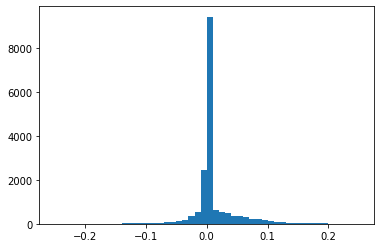

In [15]:
plt.hist((df_predictd_n - df_original_n).to_numpy().flatten(), bins=50, range=(-0.25, 0.25))
plt.show()